**Nombre:** *Edi Tomás*  **Carnet:** 201503783


> Implementar el Algoritmo A* en un puzzle de 8




BEST-FIRST
['23014675', 7, ['2', '3', '0', '1', '4', '6', '7', '5', '8'], 0, 0]
[['203146758', 7, ['2', '0', '3', '1', '4', '6', '7', '5', '8'], 1, 53], ['236140758', 9, ['2', '3', '6', '1', '4', '0', '7', '5', '8'], 1, 54]]
[['203146758', 7, ['2', '0', '3', '1', '4', '6', '7', '5', '8'], 1, 53], ['236140758', 9, ['2', '3', '6', '1', '4', '0', '7', '5', '8'], 1, 54]]
['203146758', 7, ['2', '0', '3', '1', '4', '6', '7', '5', '8'], 1, 53]
[['023146758', 7, ['0', '2', '3', '1', '4', '6', '7', '5', '8'], 2, 55], ['230146758', 9, ['2', '3', '0', '1', '4', '6', '7', '5', '8'], 2, 56], ['243106758', 8, ['2', '4', '3', '1', '0', '6', '7', '5', '8'], 2, 57]]
[['023146758', 7, ['0', '2', '3', '1', '4', '6', '7', '5', '8'], 2, 55], ['243106758', 8, ['2', '4', '3', '1', '0', '6', '7', '5', '8'], 2, 57], ['236140758', 9, ['2', '3', '6', '1', '4', '0', '7', '5', '8'], 1, 54]]
['023146758', 7, ['0', '2', '3', '1', '4', '6', '7', '5', '8'], 2, 55]
[['203146758', 9, ['2', '0', '3', '1', '4', '6', '7',

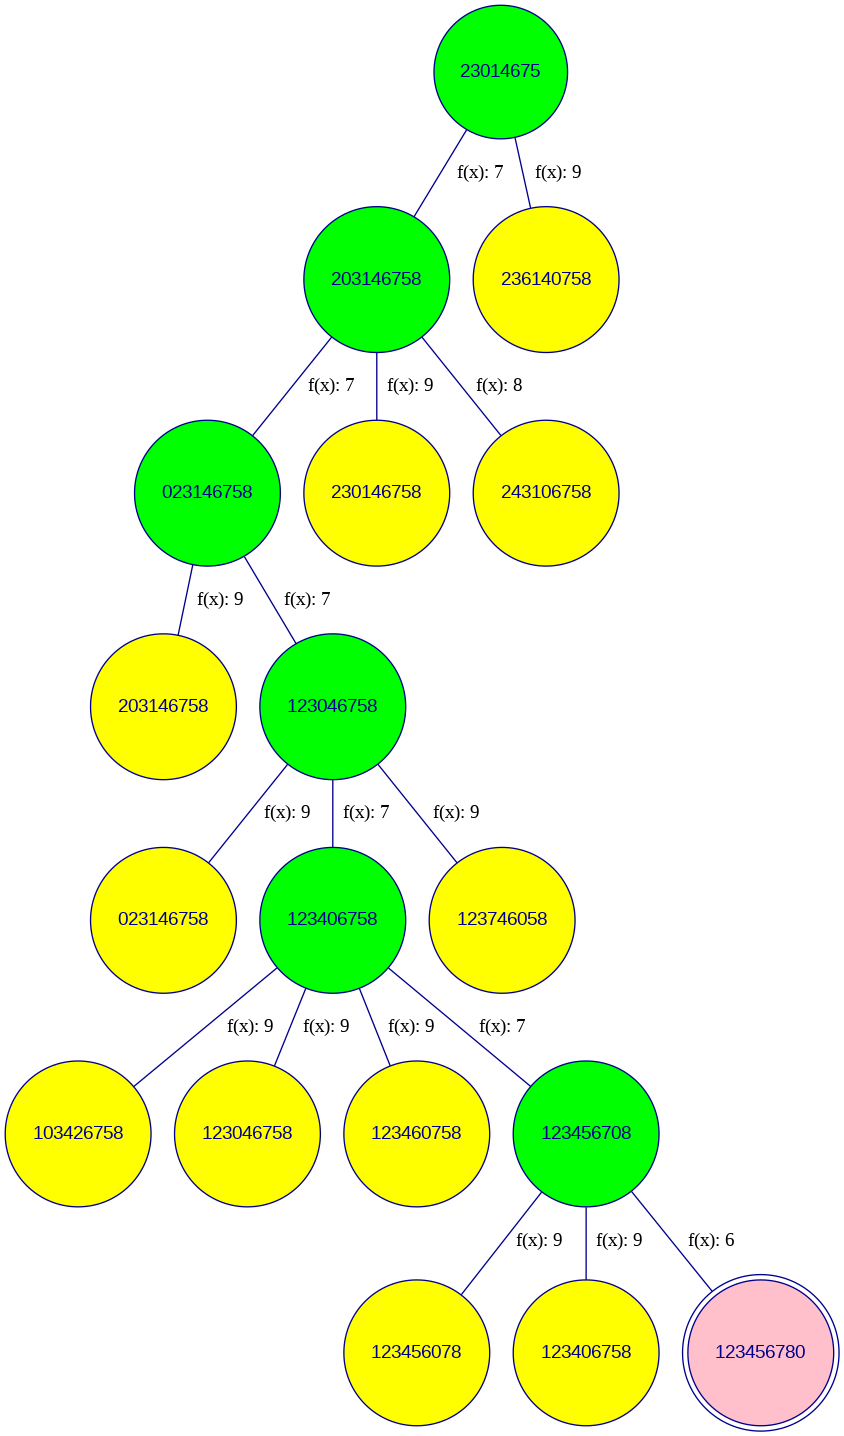

In [13]:
import random
from graphviz import Graph
i=0
def inc():
    global i
    i+=1
    return i


# tiles out heuristic
def h(current, end):
    return [x != y for (x, y) in zip(current, end)].count(True)

def succesors(n,s,ni):
    i = n.index('0')
    #print("indice "+str(i))
    if i==0: return   [[
                          n[1]+n[0]+n[2]+n[3]+n[4]+n[5]+n[6]+n[7]+n[8],
                          h([n[1],n[0],n[2],n[3],n[4],n[5],n[6],n[7],n[8]],s)+ni[3]+1,
                          [n[1],n[0],n[2],n[3],n[4],n[5],n[6],n[7],n[8]],ni[3]+1,inc()
                        ],
                       [  n[3]+n[1]+n[2]+n[0]+n[4]+n[5]+n[6]+n[7]+n[8],
                          h([n[3],n[1],n[2],n[0],n[4],n[5],n[6],n[7],n[8]],s)+ni[3]+1,
                          [n[3],n[1],n[2],n[0],n[4],n[5],n[6],n[7],n[8]],ni[3]+1,inc()
                        ]]
    elif i==1: return [
                        [ n[1]+n[0]+n[2]+n[3]+n[4]+n[5]+n[6]+n[7]+n[8],
                          h([n[1],n[0],n[2],n[3],n[4],n[5],n[6],n[7],n[8]],s)+ni[3]+1,
                          [n[1],n[0],n[2],n[3],n[4],n[5],n[6],n[7],n[8]],ni[3]+1,inc()
                        ],
                        [ n[0]+n[2]+n[1]+n[3]+n[4]+n[5]+n[6]+n[7]+n[8],
                          h([n[0],n[2],n[1],n[3],n[4],n[5],n[6],n[7],n[8]],s)+ni[3]+1,
                          [n[0],n[2],n[1],n[3],n[4],n[5],n[6],n[7],n[8]],ni[3]+1,inc()],
                        [ n[0]+n[4]+n[2]+n[3]+n[1]+n[5]+n[6]+n[7]+n[8],
                          h([n[0],n[4],n[2],n[3],n[1],n[5],n[6],n[7],n[8]],s)+ni[3]+1,
                          [n[0],n[4],n[2],n[3],n[1],n[5],n[6],n[7],n[8]],ni[3]+1,inc()
                       ]]
    elif i==2: return [
                        [n[0]+n[2]+n[1]+n[3]+n[4]+n[5]+n[6]+n[7]+n[8],
                        h([n[0],n[2],n[1],n[3],n[4],n[5],n[6],n[7],n[8]],s)+ni[3]+1,
                        [n[0],n[2],n[1],n[3],n[4],n[5],n[6],n[7],n[8]],ni[3]+1,inc()],
                        [n[0]+n[1]+n[5]+n[3]+n[4]+n[2]+n[6]+n[7]+n[8],
                        h([n[0],n[1],n[5],n[3],n[4],n[2],n[6],n[7],n[8]],s)+ni[3]+1,
                        [n[0],n[1],n[5],n[3],n[4],n[2],n[6],n[7],n[8]],ni[3]+1,inc()
                        ]]
    elif i==3: return [
                        [n[3]+n[1]+n[2]+n[0]+n[4]+n[5]+n[6]+n[7]+n[8],
                        h([n[3],n[1],n[2],n[0],n[4],n[5],n[6],n[7],n[8]],s)+ni[3]+1,
                        [n[3],n[1],n[2],n[0],n[4],n[5],n[6],n[7],n[8]],ni[3]+1,inc()],

                        [n[0]+n[1]+n[2]+n[4]+n[3]+n[5]+n[6]+n[7]+n[8],
                        h([n[0],n[1],n[2],n[4],n[3],n[5],n[6],n[7],n[8]],s)+ni[3]+1,
                        [n[0],n[1],n[2],n[4],n[3],n[5],n[6],n[7],n[8]],ni[3]+1,inc()],

                        [n[0]+n[1]+n[2]+n[6]+n[4]+n[5]+n[3]+n[7]+n[8],
                        h([n[0],n[1],n[2],n[6],n[4],n[5],n[3],n[7],n[8]],s)+ni[3]+1,
                        [n[0],n[1],n[2],n[6],n[4],n[5],n[3],n[7],n[8]],ni[3]+1,inc()
                        ]]
    elif i==4: return [
                        [n[0]+n[4]+n[2]+n[3]+n[1]+n[5]+n[6]+n[7]+n[8],
                        h([n[0],n[4],n[2],n[3],n[1],n[5],n[6],n[7],n[8]],s)+ni[3]+1,
                        [n[0],n[4],n[2],n[3],n[1],n[5],n[6],n[7],n[8]],ni[3]+1,inc()],

                       [n[0]+n[1]+n[2]+n[4]+n[3]+n[5]+n[6]+n[7]+n[8],
                        h([n[0],n[1],n[2],n[4],n[3],n[5],n[6],n[7],n[8]],s)+ni[3]+1,
                         [n[0],n[1],n[2],n[4],n[3],n[5],n[6],n[7],n[8]],ni[3]+1,inc()],
                       [n[0]+n[1]+n[2]+n[3]+n[5]+n[4]+n[6]+n[7]+n[8],
                        h([n[0],n[1],n[2],n[3],n[5],n[4],n[6],n[7],n[8]],s)+ni[3]+1,
                        [n[0],n[1],n[2],n[3],n[5],n[4],n[6],n[7],n[8]],ni[3]+1,inc()],
                       [n[0]+n[1]+n[2]+n[3]+n[7]+n[5]+n[6]+n[4]+n[8],
                        h([n[0],n[1],n[2],n[3],n[7],n[5],n[6],n[4],n[8]],s)+ni[3]+1,
                         [n[0],n[1],n[2],n[3],n[7],n[5],n[6],n[4],n[8]],ni[3]+1,inc()
                      ]]

    elif i==5: return [[n[0]+n[1]+n[5]+n[3]+n[4]+n[2]+n[6]+n[7]+n[8],
                        h([n[0],n[1],n[5],n[3],n[4],n[2],n[6],n[7],n[8]],s)+ni[3]+1,
                         [n[0],n[1],n[5],n[3],n[4],n[2],n[6],n[7],n[8]],ni[3]+1,inc()],
                       [n[0]+n[1]+n[2]+n[3]+n[5]+n[4]+n[6]+n[7]+n[8],
                        h([n[0],n[1],n[2],n[3],n[5],n[4],n[6],n[7],n[8]],s)+ni[3]+1,
                         [n[0],n[1],n[2],n[3],n[5],n[4],n[6],n[7],n[8]],ni[3]+1,inc()],
                       [n[0]+n[1]+n[2]+n[3]+n[4]+n[8]+n[6]+n[7]+n[5],
                        h([n[0],n[1],n[2],n[3],n[4],n[8],n[6],n[7],n[5]],s)+ni[3]+1,
                         [n[0],n[1],n[2],n[3],n[4],n[8],n[6],n[7],n[5]],ni[3]+1,inc()
                        ]]

    elif i==6: return [ [n[0]+n[1]+n[2]+n[6]+n[4]+n[5]+n[3]+n[7]+n[8],
                        h([n[0],n[1],n[2],n[6],n[4],n[5],n[3],n[7],n[8]],s)+ni[3]+1,
                        [n[0],n[1],n[2],n[6],n[4],n[5],n[3],n[7],n[8]],ni[3]+1,inc()],
                        [n[0]+n[1]+n[2]+n[3]+n[4]+n[5]+n[7]+n[6]+n[8],
                        h([n[0],n[1],n[2],n[3],n[4],n[5],n[7],n[6],n[8]],s)+ni[3]+1,
                        [n[0],n[1],n[2],n[3],n[4],n[5],n[7],n[6],n[8]],ni[3]+1,inc()
                        ]]

    elif i==7: return [[n[0]+n[1]+n[2]+n[3]+n[4]+n[5]+n[7]+n[6]+n[8],
                       h([n[0],n[1],n[2],n[3],n[4],n[5],n[7],n[6],n[8]],s)+ni[3]+1,
                       [n[0],n[1],n[2],n[3],n[4],n[5],n[7],n[6],n[8]] ,ni[3]+1,inc()],
                       [n[0]+n[1]+n[2]+n[3]+n[7]+n[5]+n[6]+n[4]+n[8],
                       h([n[0],n[1],n[2],n[3],n[7],n[5],n[6],n[4],n[8]],s)+ni[3]+1,
                       [n[0],n[1],n[2],n[3],n[7],n[5],n[6],n[4],n[8]],ni[3]+1,inc()],
                       [n[0]+n[1]+n[2]+n[3]+n[4]+n[5]+n[6]+n[8]+n[7],
                       h([n[0],n[1],n[2],n[3],n[4],n[5],n[6],n[8],n[7]],s)+ni[3]+1,
                       [n[0],n[1],n[2],n[3],n[4],n[5],n[6],n[8],n[7]],ni[3]+1,inc()
                       ]]

    elif i==8: return [[n[0]+n[1]+n[2]+n[3]+n[4]+n[5]+n[6]+n[8]+n[7],
                       h([n[0],n[1],n[2],n[3],n[4],n[5],n[6],n[8],n[7]],s)+ni[3]+1,
                       [n[0],n[1],n[2],n[3],n[4],n[5],n[6],n[8],n[7]],ni[3]+1,inc()],
                       [n[0]+n[1]+n[2]+n[3]+n[4]+n[8]+n[6]+n[7]+n[5],
                       h([n[0],n[1],n[2],n[3],n[4],n[8],n[6],n[7],n[5]],s)+ni[3]+1,
                       [n[0],n[1],n[2],n[3],n[4],n[8],n[6],n[7],n[5]],ni[3]+1,inc()
                       ]]

def mix(current, end):
    initial = [current, h(current, end),current,0,0]
    return random.choice(succesors(current, end,initial))[2]

def bestfirst (end, n):
    # mix the end node
    start = end
    for x in range (0, n):
        start = mix(start, end)
    s=start
    start1=s[0]+s[1]+s[2]+s[3]+s[4]+s[5]+s[6]+s[7]

    # start the search
    print ("\nBEST-FIRST")
    unvisited = [[start1, h(start, end),start,0,0]]
    visited = []
    count = 0
    while unvisited:
        count = count + 1
        current = unvisited.pop(0)
        print(current)
        visited.extend([current[2]])
        dot.node(str(current[4]), str(current[0]),fillcolor='green',style='filled')
        if current[2] == end:
            dot.node(str(current[4]), str(current[0]),shape='doublecircle',fillcolor='pink',style='filled')
            print("\n")
            print("Nivel: "+str(current[3]))
            print("No visited:"+str(len(unvisited))+" nodes ")
            print("Visited:"+str(len(visited))+" nodes ")
            print("Found:"+str(len(visited)+len(unvisited))+" nodes ")
            return print("SOLUTION IN "+str(count)+" ITERATIONS")
        temp = succesors(current[2], end,current)
        if temp:
            for x in temp:
                  dot.node(str(x[4]), str(x[0]),fillcolor='yellow',style='filled')
                  #dot.edge(str(current[4]), str(x[4]))
                  dot.edge(str(current[4]), str(x[4]),label ="  f(x): "+str(x[1])+"")
            print(temp)
            # without repeating visited nodes
            unvisited.extend([x for x in temp if x[2] not in visited])
            unvisited.sort(key=lambda x: int(x[1]))
            print (unvisited)
    print ("NO-SOLUTION")
dot = Graph()
dot.attr(splines='false')
dot.node_attr.update(shape='circle',fontname='arial', color='blue4',fontcolor='blue4')
dot.edge_attr.update(color='blue4')

end=['1','2','3','4','5','6','7','8','0']

bestfirst(end, 20)
dot.view()
dot.render('puzzle8', format='png')
from IPython.display import Image

# Mostrar el gráfico en el cuaderno
Image('puzzle8.png')